In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
lsm = pd.read_csv('/Users/alexanderithakis/Documents/GitHub/D4PG-QR-FRM/logs/MonthlySwing7_noPER/evaluations/lsm.csv')
# 3072, 4096, 5120, 6144, 7168, 8192, 9216, 10240, 11264, 12288, 13312, 14336, 15360, 16384
rl = pd.read_csv('/Users/alexanderithakis/Documents/GitHub/D4PG-QR-FRM/logs/MonthlySwing7_noPER/evaluations/rl_episode_8192.csv')
# Create a new column in the rl DataFrame which sums per path up to each and including each time step the q_t
lsm['Q_t'] = lsm.groupby('path')['q_t'].cumsum()
rl['Q_t'] = rl.groupby('path')['q_t'].cumsum()

lsm['payoff'] = np.maximum(lsm['spot'] - 1, 0) * lsm['q_t']
rl['payoff'] = np.maximum(rl['spot'] - 1, 0) * rl['q_t']

lsm.sort_values(by=['path', 'time_step'], inplace=True)
rl.sort_values(by=['path', 'time_step'], inplace=True)

rl.query('path == 0')

rl

,path,time_step,Payoff,q_exercised_norm,q_remaining_norm,time_to_maturity_norm,normalized_time,spot,X_t,Y_t,days_since_exercise_norm,q_t,reward,Q_t,payoff
0,0,0,0.000000,0.000000,1.000000,1.047619,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,1,-0.064555,0.000000,1.000000,1.000000,0.045455,0.935445,-0.066733,0.000000,0.045455,0.000000,-0.000000,0.000000,0.000000
2,0,2,0.094909,0.000000,1.000000,0.952381,0.090909,1.094909,0.090671,0.000000,0.090909,1.996890,0.189410,1.996890,0.189523
3,0,3,0.640868,0.099844,0.900156,0.904762,0.136364,1.640868,0.101741,0.393484,0.045455,1.999963,1.280696,3.996853,1.281712
4,0,4,0.258503,0.199843,0.800157,0.857143,0.181818,1.258503,0.012892,0.217031,0.045455,1.999930,0.516476,5.996783,0.516988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86727,4095,17,0.072124,0.294405,0.705595,0.238095,0.772727,1.072124,0.069641,0.000000,0.045455,1.926229,0.138431,7.814336,0.138927
86728,4095,18,0.121504,0.390717,0.609283,0.190476,0.818182,1.121504,0.114671,0.000000,0.045455,1.999829,0.242074,9.814165,0.242987
86729,4095,19,-0.021353,0.490708,0.509292,0.142857,0.863636,0.978647,-0.021584,0.000000,0.045455,0.000000,-0.000000,9.814165,0.000000
86730,4095,20,0.442142,0.490708,0.509292,0.095238,0.909091,1.442142,0.052854,0.313276,0.090909,1.999977,0.880598,11.814142,0.884274


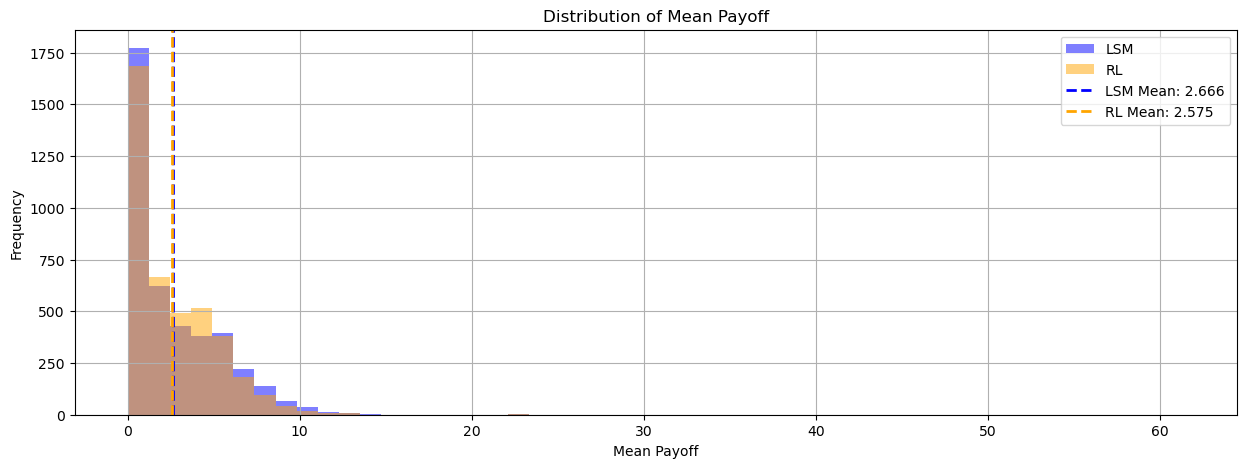

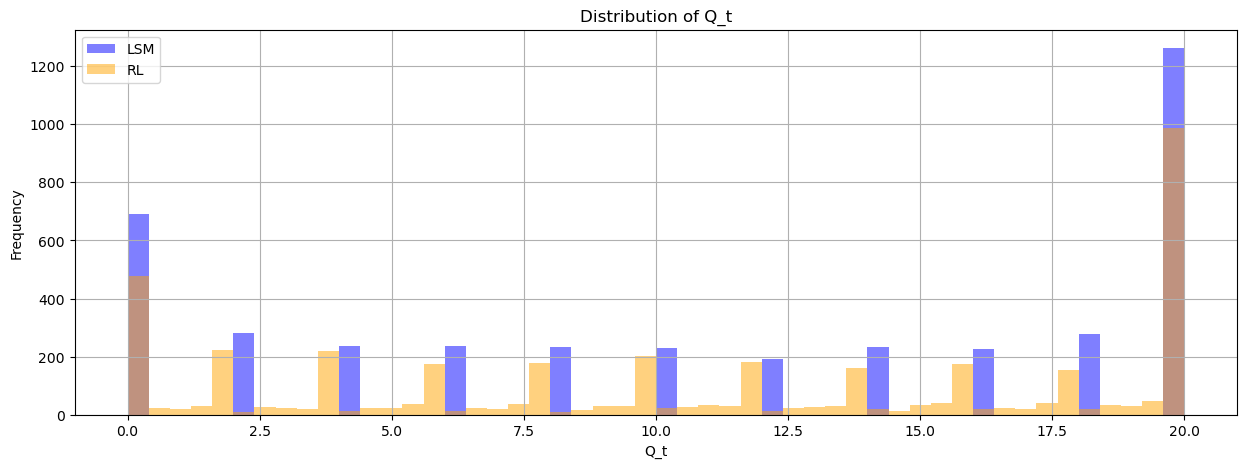

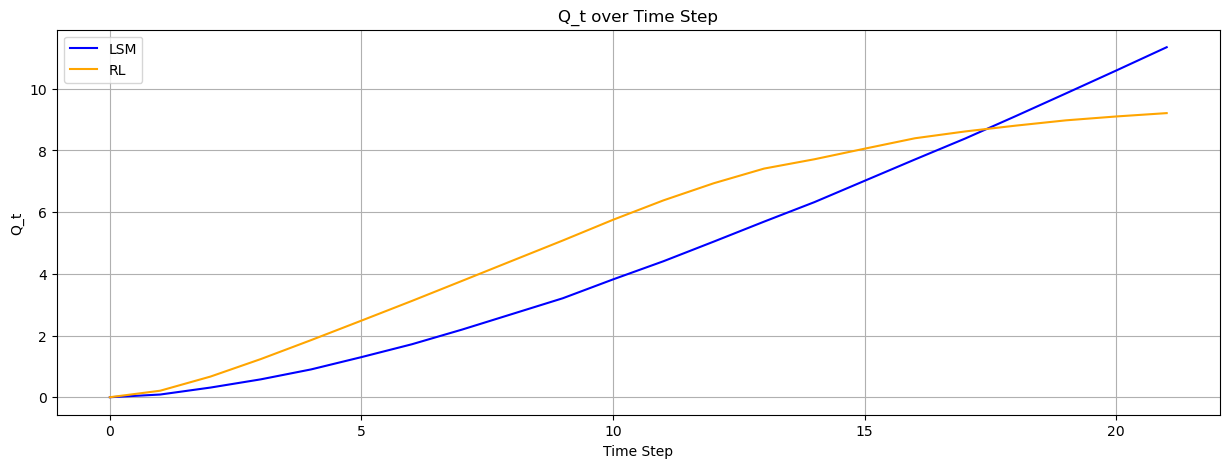

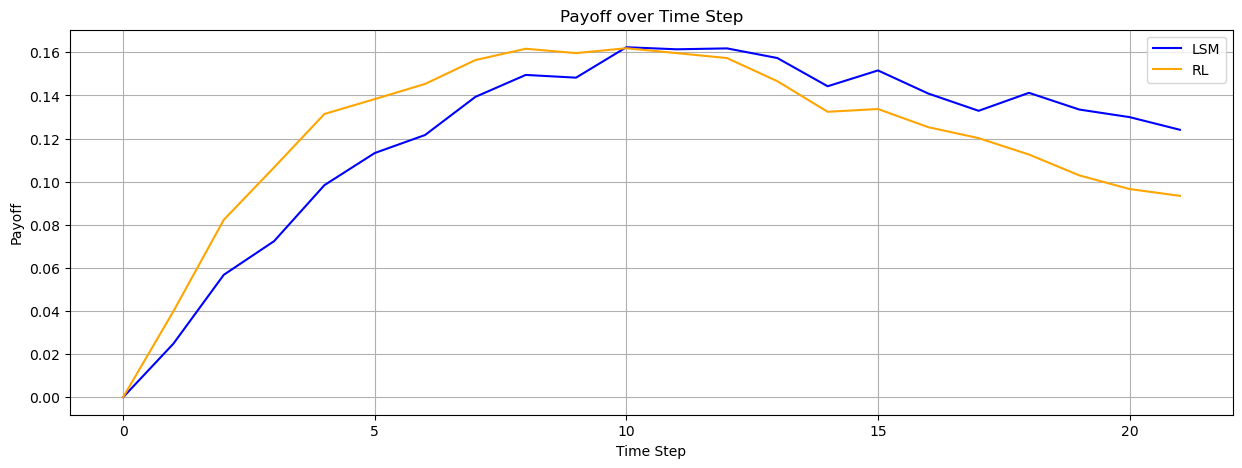

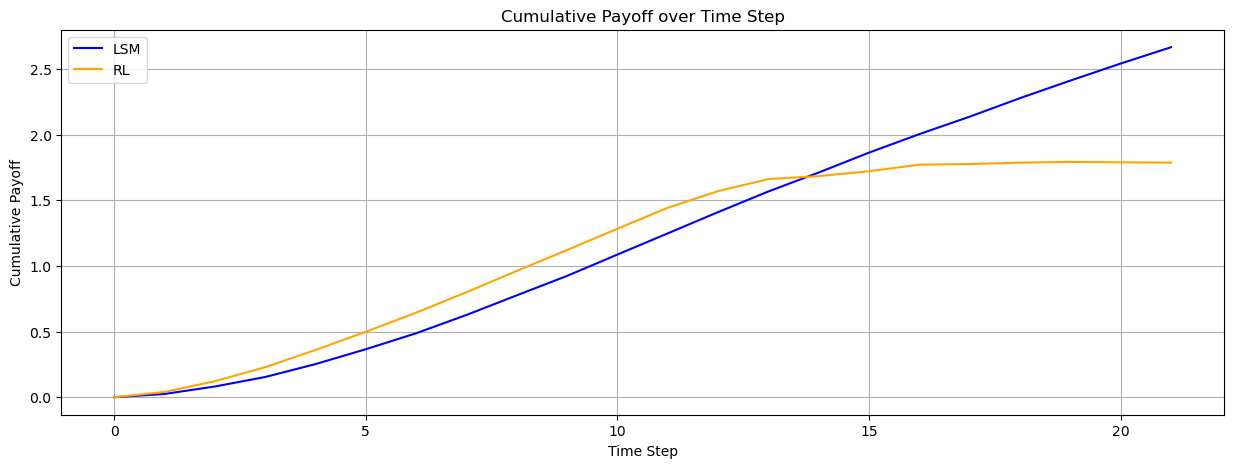

In [4]:
grouped_lsm = lsm.groupby('path').agg({'Q_t': 'max', 'time_step': 'max', 'payoff': 'sum'}).reset_index()
grouped_rl = rl.groupby('path').agg({'Q_t': 'max', 'time_step': 'max', 'payoff': 'sum'}).reset_index()

# Plot distribution of mean payoff for both lsm and rl
plt.figure(figsize=(15, 5))
plt.hist(grouped_lsm['payoff'], bins=50, alpha=0.5, label='LSM', color='blue')  
plt.hist(grouped_rl['payoff'], bins=50, alpha=0.5, label='RL', color='orange')

# Calculate means - and add them as vertical lines
mean_lsm = grouped_lsm['payoff'].mean()
mean_rl = grouped_rl['payoff'].mean()
plt.axvline(mean_lsm, color='blue', linestyle='dashed', linewidth=2, label=f'LSM Mean: {mean_lsm:.3f}')
plt.axvline(mean_rl, color='orange', linestyle='dashed', linewidth=2, label=f'RL Mean: {mean_rl:.3f}')

plt.title('Distribution of Mean Payoff')
plt.xlabel('Mean Payoff')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# plot distribution of Q_t for both lsm and rl
plt.figure(figsize=(15, 5))
plt.hist(grouped_lsm['Q_t'], bins=50, alpha=0.5, label='LSM', color='blue')
plt.hist(grouped_rl['Q_t'], bins=50, alpha=0.5, label='RL', color='orange')
plt.title('Distribution of Q_t')
plt.xlabel('Q_t')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

lsm['Payoff_t'] = lsm.groupby('path')['payoff'].cumsum()
rl['Payoff_t'] = rl.groupby('path')['payoff'].cumsum()
grouped_lsm_t = lsm.groupby('time_step').agg({'Q_t': 'mean','payoff': 'mean', 'Payoff_t': 'mean'}).reset_index()
grouped_rl_t = rl.groupby('time_step').agg({'Q_t': 'mean','payoff': 'mean', 'Payoff_t': 'mean'}).reset_index()

# plot Q_t over time_step for both lsm and rl
plt.figure(figsize=(15, 5))
plt.plot(grouped_lsm_t['time_step'], grouped_lsm_t['Q_t'], label='LSM', color='blue')
plt.plot(grouped_rl_t['time_step'], grouped_rl_t['Q_t'], label='RL', color='orange')
plt.title('Q_t over Time Step')
plt.xlabel('Time Step')
plt.ylabel('Q_t')
plt.legend()
plt.grid(True)
plt.show()

# plot payoff over time_step for both lsm and rl
plt.figure(figsize=(15, 5))
plt.plot(grouped_lsm_t['time_step'], grouped_lsm_t['payoff'], label='LSM', color='blue')
plt.plot(grouped_rl_t['time_step'], grouped_rl_t['payoff'], label='RL', color='orange')
plt.title('Payoff over Time Step')
plt.xlabel('Time Step')
plt.ylabel('Payoff')
plt.legend()
plt.grid(True)
plt.show()

# plot cumulative payoff over time_step for both lsm and rl
plt.figure(figsize=(15, 5))
plt.plot(grouped_lsm_t['time_step'], grouped_lsm_t['Payoff_t'], label='LSM', color='blue')
plt.plot(grouped_rl_t['time_step'], grouped_rl_t['Payoff_t'], label='RL', color='orange')
plt.title('Cumulative Payoff over Time Step')
plt.xlabel('Time Step')
plt.ylabel('Cumulative Payoff')
plt.legend()
plt.grid(True)
plt.show()